In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import json
import os
import re

In [2]:
def parse_scenario_name(scenario_name):
    regex = 'sp\.(\w+)_ep\.(\w+)_hs\.(\d+|\d+\.\d+)_hc\.(\d+)\.json'
    match = re.search(regex, scenario_name)
    #print(scenario_name)
    return {
        'start_point': match.group(1),
        'end_point': match.group(2),
        'human_speed': float(match.group(3)),
        'human_count': int(match.group(4))
    }

parse_scenario_name('sp.fh_ep.ld_hs.2_hc.25.json')

{'start_point': 'fh', 'end_point': 'ld', 'human_speed': 2.0, 'human_count': 25}

In [3]:
def load_evals(run):
    eval_dir = os.path.join('evals', run)
    eval_files = os.listdir(eval_dir)
    evals = list()
    for eval_file in eval_files:
        eval_file_path = os.path.join(eval_dir, eval_file)
        with open(eval_file_path, 'r') as f:
            file_contents = f.read()
            scenario_info = parse_scenario_name(eval_file)
            eval_data = json.loads(file_contents)
            eval_data['scenario'] = scenario_info
            evals.append(eval_data)
    return pd.json_normalize(evals)

df = load_evals('1602829757')
df.loc[df['time_to_goal'] >= 20, 'time_to_goal'] = None
df.head()

,time_to_goal,collision_count,min_distance_to_human,speed_stats.mean,difference_in_speed_with_near_humans.mean,difference_in_speed_with_near_humans.stdev,scenario.start_point,scenario.end_point,scenario.human_speed,scenario.human_count
0,NaN,13,0.412679,0.080490,-1.458141,0.238906,rd,fh,1.5,20
1,NaN,6,0.035794,0.399712,-1.284046,0.587186,fh,rd,1.5,10
2,14.034605,2,0.247304,1.980437,0.985969,0.076089,ld,rd,1.0,15
3,18.095118,7,0.368654,1.975620,0.972329,0.066719,rd,fh,1.0,15
4,NaN,3,0.292190,1.718625,-0.256460,0.521384,rd,ld,2.0,10


In [4]:
success = df['time_to_goal'].notna()
successes = df[success]
successes.head()

,time_to_goal,collision_count,min_distance_to_human,speed_stats.mean,difference_in_speed_with_near_humans.mean,difference_in_speed_with_near_humans.stdev,scenario.start_point,scenario.end_point,scenario.human_speed,scenario.human_count
2,14.034605,2,0.247304,1.980437,0.985969,7.608920e-02,ld,rd,1.0,15
3,18.095118,7,0.368654,1.975620,0.972329,6.671940e-02,rd,fh,1.0,15
5,7.099420,1,0.453751,1.990355,1.000000,2.273864e-08,ld,fh,1.0,1
10,18.099999,3,0.242022,1.980366,0.478019,1.255819e-01,rd,fh,1.5,5
11,18.089652,14,0.054567,1.978477,0.491907,4.838293e-02,rd,fh,1.5,15


In [5]:
def split_data(start_point, end_point):
    data = df
    data = data[data['scenario.start_point'] == start_point]
    data = data[data['scenario.end_point'] == end_point]
    return data

fh_to_ld = split_data('fh', 'ld')

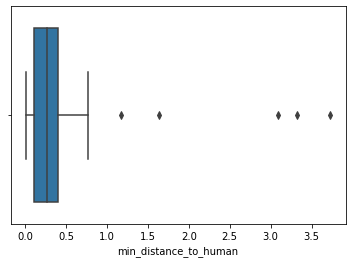

In [6]:
sns.boxplot(x=successes['min_distance_to_human'])

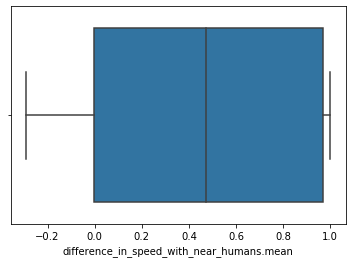

In [7]:
sns.boxplot(x=successes['difference_in_speed_with_near_humans.mean'])

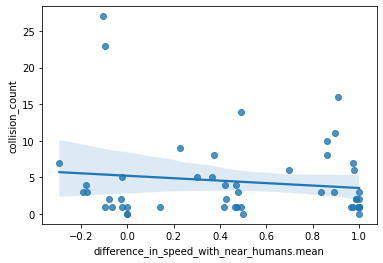

In [8]:
sns.regplot(x='difference_in_speed_with_near_humans.mean', y='collision_count', data=successes)
# TODO: split speeds by state

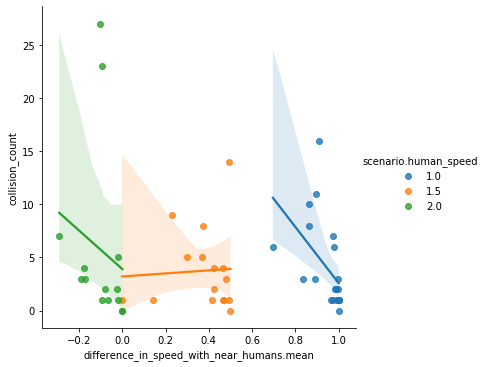

In [9]:
sns.lmplot(x='difference_in_speed_with_near_humans.mean', y='collision_count', data=successes, hue='scenario.human_speed')

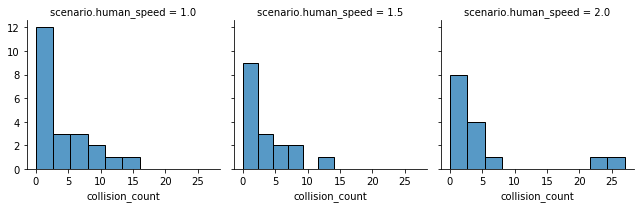

In [10]:
g = sns.FacetGrid(successes, col="scenario.human_speed")
g.map(sns.histplot, "collision_count")

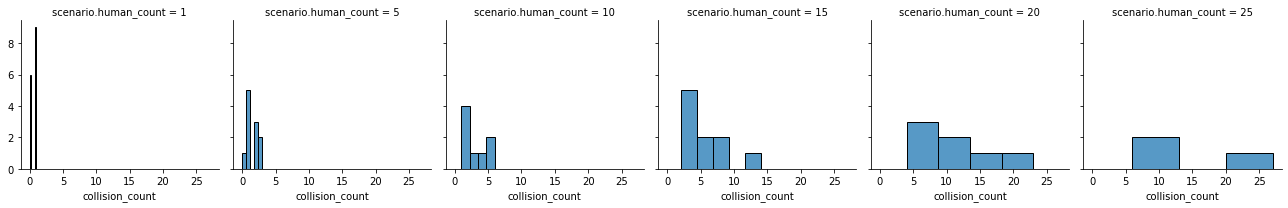

In [11]:
g = sns.FacetGrid(successes, col="scenario.human_count")
g.map(sns.histplot, "collision_count")